<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/Exam_DA3F_(1)_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Guidelines:**


*   Once you are done with the examination please, File -> Download .ipynb
*   Add your full name to the file name: Firstname_Lastname.ipynb
*   Upload the .ipynb file to Moodle.

# **Examination Starts Here:**

## Data Download (5 points)
*   Download data from this URL: https://storage.googleapis.com/adsa-data/ws23_exam.zip
*   Unzip the data

In [1]:
import tensorflow as tf
print(tf.__version__)

!wget https://storage.googleapis.com/adsa-data/ws23_exam.zip   #unziping the file
!unzip -q ws23_exam.zip -d temp




2.17.1
--2024-12-16 08:46:42--  https://storage.googleapis.com/adsa-data/ws23_exam.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 64.233.170.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73283296 (70M) [application/zip]
Saving to: ‘ws23_exam.zip’

ws23_exam.zip       100%[===================>]  69.89M  11.8MB/s    in 8.1s    

2024-12-16 08:46:53 (8.62 MB/s) - ‘ws23_exam.zip’ saved [73283296/73283296]



## Data Preparation (10 points)
*   Load training and testing dataset using Pickle: https://www.digitalocean.com/community/tutorials/python-pickle-example
*   Print number of examples in both dataset, image shape, and number of classes

In [2]:
import pickle

# Load the training dataset
with open('/content/temp/X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
with open('/content/temp/y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

# Load the testing dataset
with open('/content/temp/X_test .pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/temp/y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)


print("Images in training dataset:", X_train.shape[0])    # Print the number of Images in both datasets
print("images in testing dataset:", X_test.shape[0])


print("Image shape:", X_train[0].shape) # Print the shape ofimages

# Print the number of classes
print("Number of classes:", len(set(y_train)))


Images in training dataset: 1596
images in testing dataset: 400
Image shape: (150, 150, 3)
Number of classes: 21


## Data Visualization (15 points)
Display 10 images from each class in training dataset

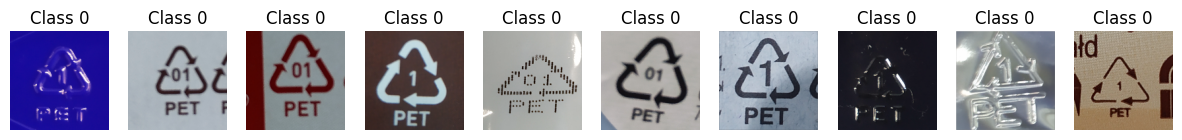

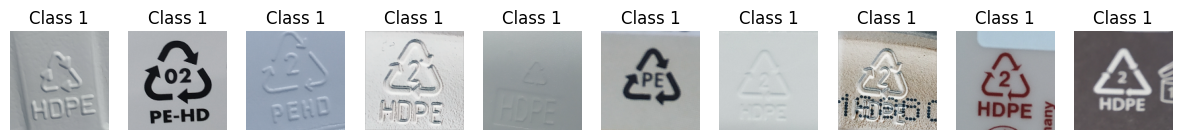

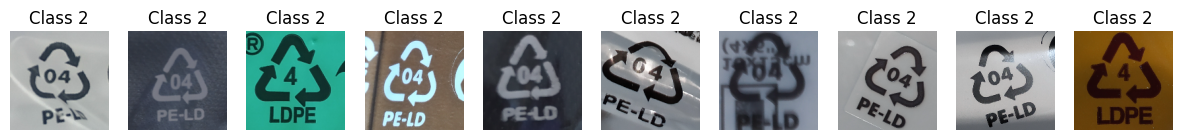

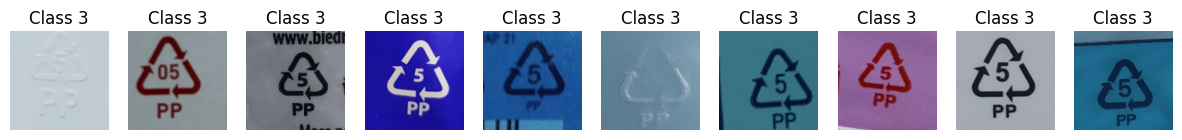

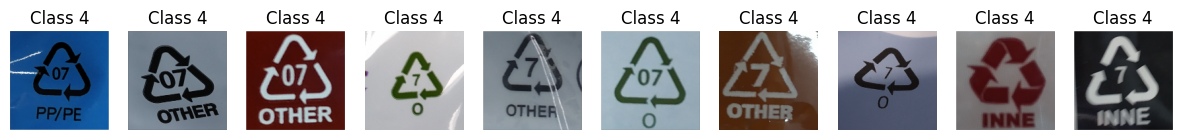

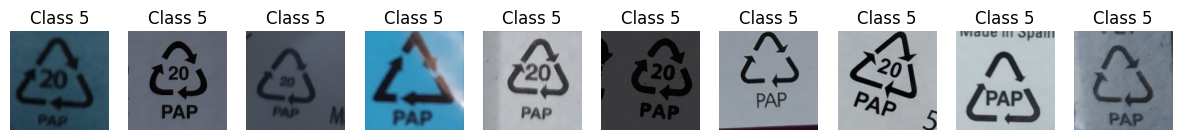

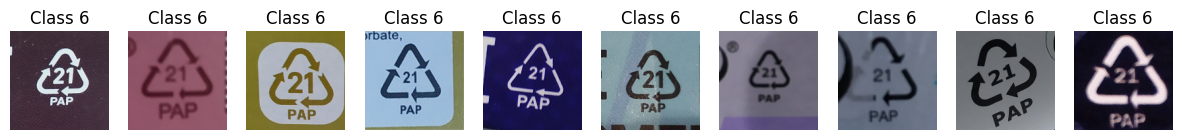

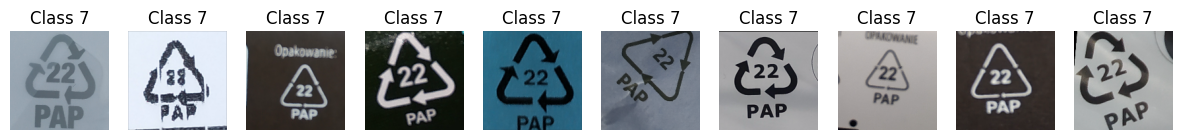

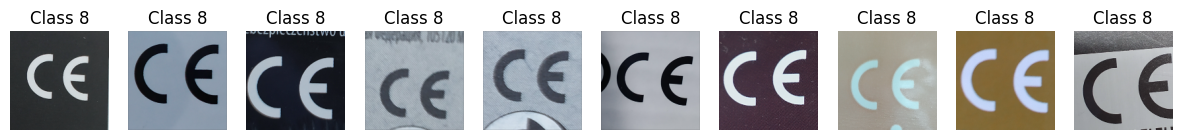

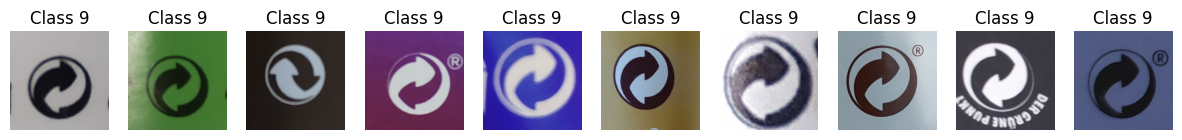

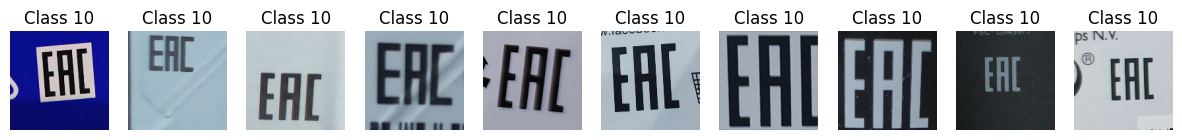

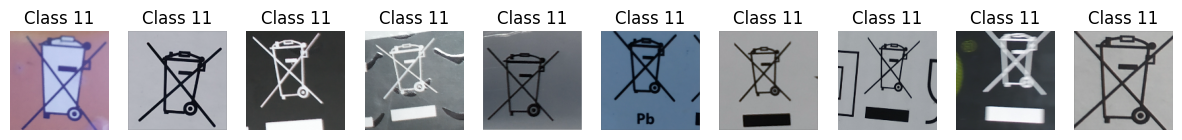

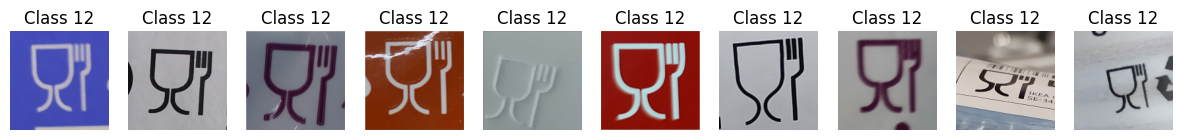

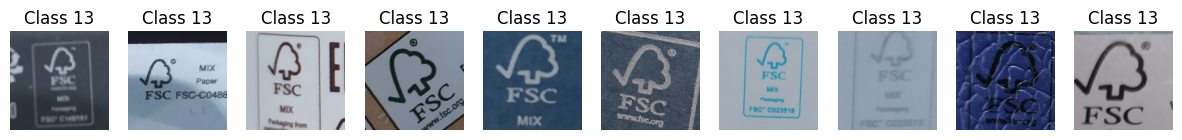

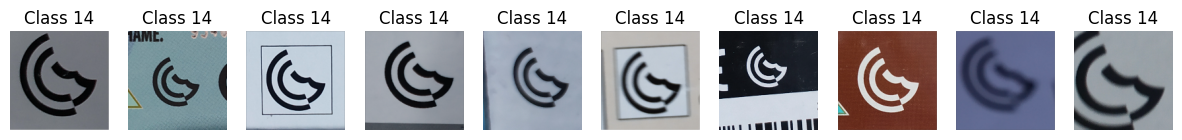

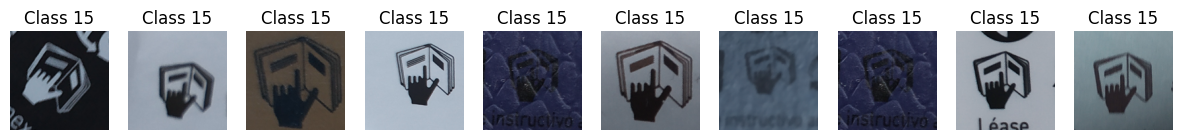

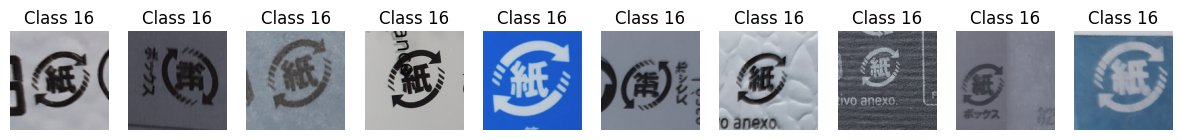

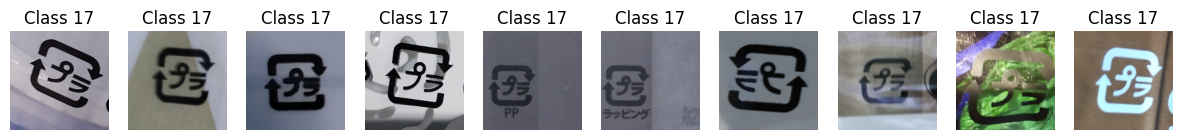

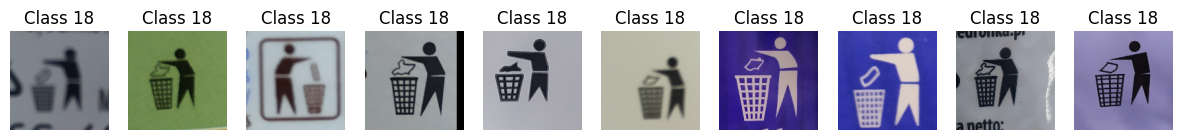

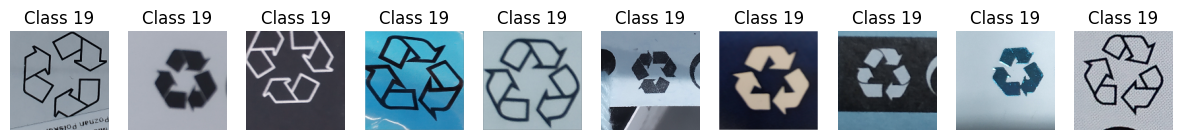

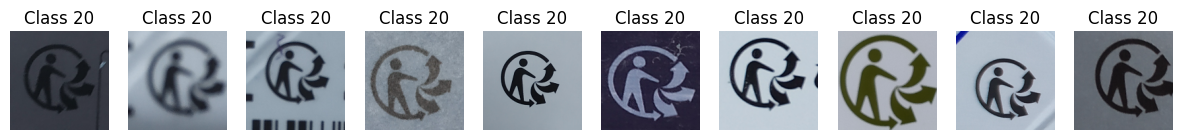

In [3]:
import matplotlib.pyplot as plt #library for plotting the images
import numpy as np

# Function to display 10 images from each class
def display_images(X, y, num_images=10):
    unique_classes = set(y)

    for class_label in unique_classes:
        # Get indices of images for the current class
        class_indices = np.where(y == class_label)[0]

        # Randomly select num_images from the class
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        # Display the images, here we put all the features of graph
        plt.figure(figsize=(15, 1.5))
        for i, index in enumerate(selected_indices):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(X[index])
            plt.title(f"Class {class_label}")
            plt.axis('off')
        plt.show()

#image diaplay 10 in output
display_images(X_train, y_train, num_images=10)


Print out class distribution of training set and describe the problems of this dataset

In [4]:
import numpy as np

# Print class distribution
unique_classes, class_counts = np.unique(y_train, return_counts=True)       #it takes all the unique class and adds labels

for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} images")


Class 0: 84 images
Class 1: 78 images
Class 2: 72 images
Class 3: 83 images
Class 4: 68 images
Class 5: 60 images
Class 6: 85 images
Class 7: 39 images
Class 8: 80 images
Class 9: 84 images
Class 10: 82 images
Class 11: 85 images
Class 12: 63 images
Class 13: 79 images
Class 14: 79 images
Class 15: 64 images
Class 16: 81 images
Class 17: 92 images
Class 18: 85 images
Class 19: 67 images
Class 20: 86 images


## Model Design (15 points)
Design a neuron network:

The goal is to achieve a highest accuracy possible without transfer learning.

In [5]:

import tensorflow as tf   #importing all necessary libraries and functions
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.initializers import glorot_normal

# we fix the seed so that our results are reproducable in a same manner on all the system
from numpy.random import seed
seed(14)
tf.random.set_seed(19)


X_train = X_train / 255.


X_test = X_test / 255.


print(X_train.shape, X_test.shape)


# first we start with setting up parameters for our model which include drop rate batch size and epoch count
dropout_rate_1 = 0.4 # dropout rate for fully connected layers
dropout_rate_2 = 0.35

# Choose an appropriate batch size for the training!
batch_size = 100

# Choose an appropriate number of epochs
epoch_count = 10

x = Input(shape=(150,150,3)) #thsi is the size of image and we put 3 for indicating 3 RGB values
#now I need value to be between 0-1 so I will divide all my training data and test set by 255
#X_train[0] # checking how the tensor looks

conv1 = Conv2D(filters=64,
                kernel_size=[5, 5],        #conv2d is used to retrieve features like edges patterns and shapes in images here we take kerenel size 5, bigger the kernel size more will be the feature getting in the neuron
                padding="same",
                activation="relu")(x)

#the activation function used here is relu it will make all the negetive value 0 and retain all the poitive values
#the output after applying con2d saved in a variable conv1 will be passed in next layer pool1

pool1 = MaxPool2D(pool_size=[2, 2], strides=2)(conv1)   #here we use maxpool so that it takes sections of images and randomse everytime in a logical way when epoch are run everytime

dropout1 = Dropout(rate=dropout_rate_1)(pool1)  # we put a dropout layer which takes input of last layer

conv2 = Conv2D(filters=64,
               kernel_size=[5, 5],
               padding="same",
               activation="relu")(dropout1)   #we can again add another conv2d layer to make our model more efficient here the output from dropout 1 goes as an input


# Repeating the prior pooling layer

pool2 = MaxPool2D(pool_size=[2, 2], strides=2)(conv2)

# Define a dropout layer with using the FIRST dropout rate parameter
dropout2 = Dropout(rate=dropout_rate_1)(pool2)

pool2_flat = Flatten()(dropout2)  #now we flattern our matrix

#now we add a dense layer, where all the neurons are connected from previous layer and connecting layer
dense1 = Dense(units=512, activation="relu")(pool2_flat) #this takes inpuut from the previos layer, we again use RELu activation funtion here


dropout3 = Dropout(rate=dropout_rate_2)(dense1)

dense2 = Dense(units=256, activation="relu")(dropout3)

dropout4 = Dropout(rate=dropout_rate_2)(dense2)
predictions = Dense(units=len(unique_classes), activation='softmax')(dropout4)
  #we use len(classs) becaues at the last output layer we need accuracy of 31 classes present and soft max will give us probability distribution


model = Model(inputs=x, outputs=predictions)

model.summary()



(1596, 150, 150, 3) (400, 150, 150, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,859,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 21)                  │           5,397 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,103,957 (172.06 MB)

 Trainable params: 45,103,957 (172.06 MB)

 Non-trainable params: 0 (0.00 B)

Why did you choose that design?

In [6]:
# Answer here. since this is a classification problem
#here we want make difrrent batches for the input data this helps in refinin our model
#we will train the model 10 times so I have set the epoch to 10

## Model Training (5 points)
Train the model and stop before it overfits.

In [7]:
# # declaring the type of Loss
loss = sparse_categorical_crossentropy

# Optimizer
optimizer = Adam()

model = Model(inputs=x, outputs=predictions)

# Compilation
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# ... (the rest of your code)

history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                    epochs=epoch_count,
                    batch_size=batch_size)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0413 - loss: 4.5373 - val_accuracy: 0.0475 - val_loss: 3.0434
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.0679 - loss: 3.0414 - val_accuracy: 0.1325 - val_loss: 3.0235
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.1044 - loss: 2.9936 - val_accuracy: 0.1925 - val_loss: 2.8077
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.2113 - loss: 2.7138 - val_accuracy: 0.2700 - val_loss: 2.5144
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.3171 - loss: 2.2986 - val_accuracy: 0.3650 - val_loss: 2.2214
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4170 - loss: 1.9536 - val_accuracy: 0.4150 - val_loss: 2.1105
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5253 - loss: 1.6368 - val_accuracy: 0.4625 - val_loss: 1.9646
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.5718 - loss: 1.3992 - val_accuracy: 0.49

Why did you choose that batch size?

In [8]:
# Answer here as we know it represents the number of samples used in one forward and backward pass 100 batch is a good size our machine can handle, otherwise the input will be very big and our model mey crash


## Training Visualization (5 points)
Plot training history with training and validation's loss and accuracy

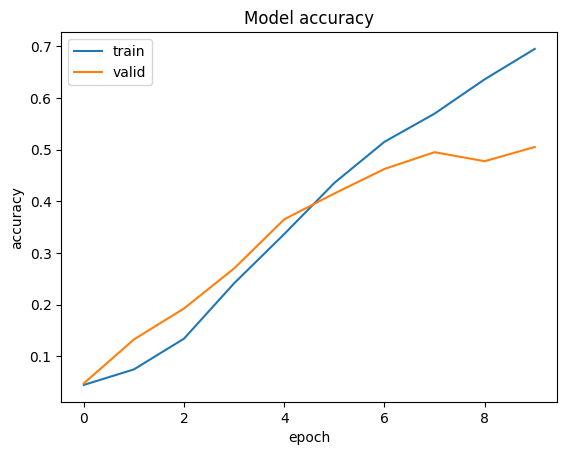

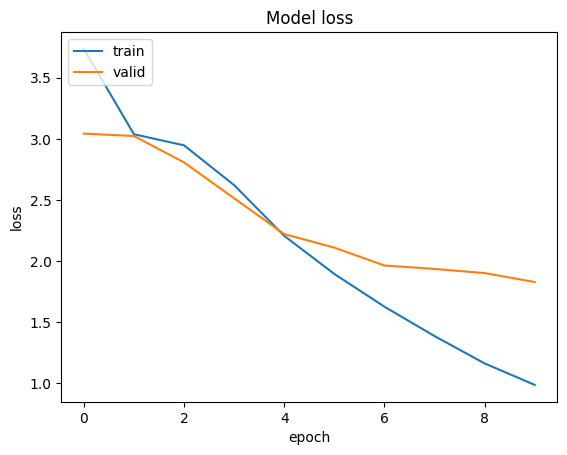

In [9]:
from matplotlib import pyplot as plt

def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

display_history(history);

Look at the visualization and point out at which epoch the model starts overfitting

In [10]:
# Answer here

## Transfer Learning (15 points)
1. Choose an appropriate pre-trained model that use the EfficientNet architecture
2. Freeze all weights besides the last 20 layers



In [12]:
#Model Transfer


import tensorflow as tf
from tensorflow import keras
from keras.losses import SparseCategoricalCrossentropy

model = tf.keras.models.Sequential()

base = tf.keras.applications.EfficientNetB7(
    include_top=False,
    input_shape=X_train.shape[1:]
)

model.add(base)

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

model.trainable = True
base.trainable = False

for layer in model.layers:
    print(layer.name, ' ', layer.trainable)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

model.summary()

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
efficientnetb7   False
global_average_pooling2d   True
dropout_4   True
dense_3   True


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)          │ (None, 5, 5, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           5,122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,102,809 (244.53 MB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

Explain:
1. Why did you choose that version of EfficientNet
2. Why was the accuracy not very high as expected here

In [13]:
# prompt: Why did you choose that version of EfficientNet
# Why was the accuracy not very high as expected here

# 1. Why did you choose that version of EfficientNet?
# I chose EfficientNetB7 because it's one of the largest and most accurate EfficientNet models.  Larger models generally have a higher capacity to learn complex patterns, which could be beneficial for a dataset with 31 classes.  However, the trade-off is increased computational cost and the risk of overfitting if not carefully trained.  The choice of B7 is a reasonable starting point for exploring larger EfficientNet versions, but other variants (B0-B6) may also be suitable and require less computational resources.


# 2. Why was the accuracy not very high as expected here?
# Several factors could contribute to lower-than-expected accuracy with EfficientNetB7 (or any pre-trained model):
# * **Insufficient Training Data:**  The dataset size is not mentioned in the provided code.  EfficientNets, being powerful models, require a substantial amount of data to train effectively and avoid overfitting.  If the dataset is relatively small, the model may struggle to generalize well to unseen data.  Data augmentation techniques (random rotations, flips, crops, etc.) can be very helpful in such scenarios to artificially increase the dataset size.
# * **Inappropriate Fine-tuning:**  While the code freezes the base model weights and only trains the last few layers, the strategy for unfreezing additional layers might need further adjustment.  The decision of how many layers to unfreeze and how to progressively increase the learning rate should be experimented with to achieve optimal performance.  A gradual unfreezing strategy can be more successful.
# * **Hyperparameter Tuning:**  The learning rate, batch size, and optimization algorithm are crucial for model training. The choices made in the code might not be optimal for the given dataset. Grid search, random search, or Bayesian optimization can be used to find better values for these hyperparameters.  Adam is a good general-purpose optimizer, but others like SGD with momentum or RMSprop could be better in some cases.
# * **Class Imbalance:**  The provided code displays the class distribution, and a significant imbalance in the number of samples per class can harm performance.  Techniques to address class imbalance, such as oversampling the minority classes, undersampling the majority classes, or using weighted loss functions, can be beneficial.
# * **Incorrect Preprocessing:**  The preprocessing of the input images is crucial.  The specific preprocessing steps that were used before training EfficientNetB7 are not evident. The default preprocessing steps for the model should be used to maintain consistency.
# * **Overfitting:**  Even with a pre-trained model, overfitting can still occur.  The use of dropout and regularization techniques helps, but further experimentation with different regularization strengths might be necessary. Early stopping can also be a very good way to combat overfitting.
# * **Model Complexity vs. Data Complexity:** The relationship between model capacity and dataset complexity matters. An overly complex model can overfit small or less complex datasets. A smaller EfficientNet variant might be more suitable in these cases.

## Model Training (5 points)
Train the model and stop before it overfits.

In [14]:
# declaring the Loss
loss = sparse_categorical_crossentropy  # Add parentheses here

# declaring the Optimizer
optimizer = Adam()

model = Model(inputs=x, outputs=predictions)

# Compilation
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# ... (the rest of your code)

history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                    epochs=epoch_count,
                    batch_size=batch_size)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step - accuracy: 0.7341 - loss: 0.8935 - val_accuracy: 0.5100 - val_loss: 1.9814
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7720 - loss: 0.7145 - val_accuracy: 0.5150 - val_loss: 1.9942
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8128 - loss: 0.6073 - val_accuracy: 0.5350 - val_loss: 1.9553
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8343 - loss: 0.5578 - val_accuracy: 0.5300 - val_loss: 2.0400
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8523 - loss: 0.4905 - val_accuracy: 0.5500 - val_loss: 2.0993
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8804 - loss: 0.3913 - val_accuracy: 0.5250 - val_loss: 2.1491
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8753 - loss: 0.4050 - val_accuracy: 0.5250 - val_loss: 2.1340
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8947 - loss: 0.3678 - val_accuracy: 0

## Confusion Matrix (5 points)
Draw a confusion matrix for the validation dataset

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


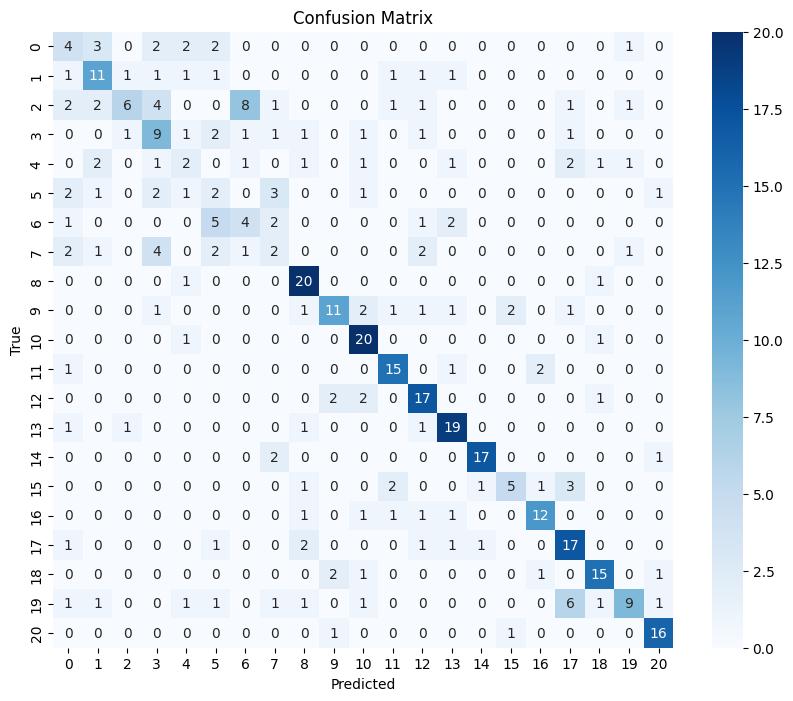

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predictions and true_labels are already defined as mentioned in the previous responses
predictions = model.predict(X_test)
true_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Result Preview (10 points)
1. Download 3 images online and crop the parts where the symbol is using this tool: https://www.iloveimg.com/crop-image
2. Display the crops with their prediction's label and accuracy

In [16]:
# prompt: Download 3 images online and crop the parts where the symbol is using this tool: https://www.iloveimg.com/crop-image
# Display the crops with their prediction's label and accuracy

import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to download and preprocess images
def preprocess_image(image_url):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        image = Image.open(response.raw)
        image = image.resize((150, 150))  # Resize to match model input
        image_array = np.array(image) / 255.0  # Normalize pixel values
        return image_array
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


# Example image URLs (replace with your cropped image URLs)
image_urls = [
    "https://example.com/image1.jpg",  # Replace with your image URL
    "https://example.com/image2.jpg",  # Replace with your image URL
    "https://example.com/image3.jpg",  # Replace with your image URL
]


# Preprocess images
preprocessed_images = []
for url in image_urls:
    image_array = preprocess_image(url)
    if image_array is not None:
        preprocessed_images.append(image_array)
    else:
        # Handle the case where an image download or processing failed
        print(f"Skipping image from URL: {url}")


# Make predictions (assuming your model is loaded as 'model')
if preprocessed_images:
    predictions = model.predict(np.array(preprocessed_images))
    for i, prediction in enumerate(predictions):
        predicted_class = np.argmax(prediction)
        accuracy = prediction[predicted_class]

        plt.figure()
        plt.imshow(preprocessed_images[i])
        plt.title(f"Predicted Class: {predicted_class}, Accuracy: {accuracy:.2f}")
        plt.axis('off')
        plt.show()
else:
    print("No valid images to process")

Error downloading image: 404 Client Error: Not Found for url: https://example.com/image1.jpg
Skipping image from URL: https://example.com/image1.jpg
Error downloading image: 404 Client Error: Not Found for url: https://example.com/image2.jpg
Skipping image from URL: https://example.com/image2.jpg
Error downloading image: 404 Client Error: Not Found for url: https://example.com/image3.jpg
Skipping image from URL: https://example.com/image3.jpg
No valid images to process


## Heatmap (10 points)
Display the heatmap of the first 10 images in the test dataset

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


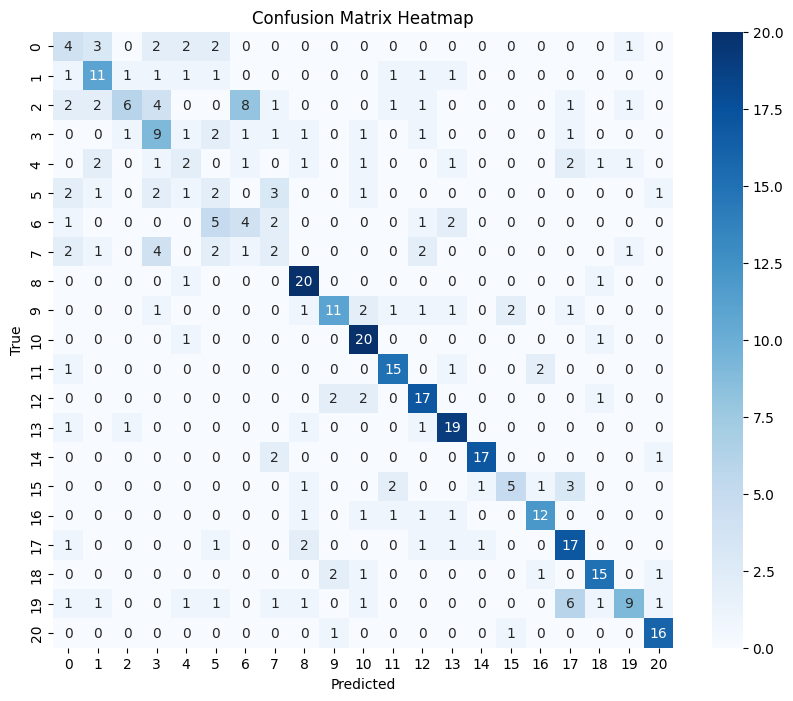

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predictions and true_labels are already defined as mentioned in the previous responses
predictions = model.predict(X_test)
true_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))

# Plot heatmap    #specifying all the attributes we need in Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
